In [70]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import imblearn
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn import __version__ as imblearn_version
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import QuantileTransformer

#from sklearn.pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
sns.reset_orig() 

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, make_scorer,precision_recall_curve, precision_score, recall_score, roc_curve, precision_recall_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [71]:
#Depedencies
print('pd',pd.__version__)
print('np',np.__version__)
print('plt',matplotlib.__version__)
print('sns',sns.__version__)
print('imblearn',imblearn.__version__)
print('sklearn',sklearn.__version__)
print('xgb',xgb.__version__)
print('lightgbm',lightgbm.__version__)

pd 1.5.3
np 1.24.3
plt 3.7.3
sns 0.12.2
imblearn 0.10.1
sklearn 1.2.2
xgb 1.7.3
lightgbm 4.3.0


In [72]:
print(os.getcwd())
rawraw_df = pd.read_csv('data\ecom-user-churn-data.csv')
rawraw_df.head()

d:\DSS Tilburg\Thesis\ecommerce_churn_prediction


,visitorid,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,tran_n,tran_n_r,rev_sum,rev_sum_r,major_spend_r,int_cat_n_avg,int_itm_n_avg,ses_mo_avg,ses_mo_sd,ses_ho_avg,ses_ho_sd,ses_wknd_r,ses_len_avg,time_to_int,time_to_tran,int_cat1_n,int_cat2_n,int_cat3_n,int_cat4_n,int_cat5_n,int_cat6_n,int_cat7_n,int_cat8_n,int_cat9_n,int_cat10_n,int_cat11_n,int_cat12_n,int_cat13_n,int_cat15_n,int_cat16_n,int_cat17_n,int_cat18_n,int_cat19_n,int_cat20_n,int_cat21_n,int_cat22_n,int_cat23_n,int_cat24_n,target_class
0,89,23.0,16.0,0.0,0.0,39.0,2.0,0.051282,3.0,1.500000,0.0,0.0,0.0,0.0,0.0,1.0,1.5,7.000000,0.000000,11.000000,7.071068,0.500000,2.866667,1.911111,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1
1,251,23.0,61.0,0.0,0.0,85.0,2.0,0.023529,2.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.000000,1.414214,13.500000,2.121320,1.000000,0.000000,0.000000,-1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,270,14.0,0.1,0.3,3.0,21.0,11.0,0.523810,13.0,1.181818,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.454546,0.522233,12.636364,4.342182,0.363636,1.104545,0.934615,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,1
3,298,11.0,13.0,0.0,0.0,24.0,2.0,0.083333,4.0,2.000000,0.0,0.0,0.0,0.0,0.0,1.5,1.5,7.500000,0.707107,11.500000,4.949748,0.000000,0.508333,0.254167,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,1
4,474,16.0,26.0,0.0,0.0,43.0,2.0,0.046512,2.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.000000,0.000000,19.500000,2.121320,0.500000,0.000000,0.000000,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1


# 1. Missing values and data distribution

In [73]:
rawraw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49358 entries, 0 to 49357
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   visitorid      49358 non-null  int64  
 1   ses_rec        49358 non-null  float64
 2   ses_rec_avg    49358 non-null  float64
 3   ses_rec_sd     49358 non-null  float64
 4   ses_rec_cv     49358 non-null  float64
 5   user_rec       49358 non-null  float64
 6   ses_n          49358 non-null  float64
 7   ses_n_r        49358 non-null  float64
 8   int_n          49358 non-null  float64
 9   int_n_r        49358 non-null  float64
 10  tran_n         49358 non-null  float64
 11  tran_n_r       49358 non-null  float64
 12  rev_sum        49358 non-null  float64
 13  rev_sum_r      49358 non-null  float64
 14  major_spend_r  49358 non-null  float64
 15  int_cat_n_avg  49358 non-null  float64
 16  int_itm_n_avg  49358 non-null  float64
 17  ses_mo_avg     49358 non-null  float64
 18  ses_mo

In [74]:
pd.set_option('display.max_columns', None)
stat_df = rawraw_df.describe().T
stat_df = stat_df.round(3)
stat_df.to_csv('data/statistics.csv',index=True)
stat_df

,count,mean,std,min,25%,50%,75%,max
visitorid,49358.0,707298.610,407209.816,37.000,353292.000,710091.000,1060354.750,1.407573e+06
ses_rec,49358.0,15.455,9.185,0.000,7.000,16.000,23.000,3.100000e+01
ses_rec_avg,49358.0,11.232,18.163,0.000,0.000,2.250,14.250,9.900000e+01
ses_rec_sd,49358.0,2.712,6.584,0.000,0.000,0.000,1.000,4.750000e+01
ses_rec_cv,49358.0,-0.020,0.918,-1.000,-1.000,0.000,0.639,1.152500e+01
user_rec,49358.0,33.823,25.238,0.000,16.000,26.000,46.000,9.900000e+01
ses_n,49358.0,3.366,7.381,2.000,2.000,2.000,3.000,4.750000e+02
ses_n_r,49358.0,0.172,0.373,-1.000,0.061,0.091,0.167,1.800000e+01
int_n,49358.0,6.716,38.529,2.000,2.000,3.000,6.000,5.549000e+03
int_n_r,49358.0,1.721,1.456,1.000,1.000,1.250,2.000,5.900000e+01


In [75]:
rawraw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49358 entries, 0 to 49357
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   visitorid      49358 non-null  int64  
 1   ses_rec        49358 non-null  float64
 2   ses_rec_avg    49358 non-null  float64
 3   ses_rec_sd     49358 non-null  float64
 4   ses_rec_cv     49358 non-null  float64
 5   user_rec       49358 non-null  float64
 6   ses_n          49358 non-null  float64
 7   ses_n_r        49358 non-null  float64
 8   int_n          49358 non-null  float64
 9   int_n_r        49358 non-null  float64
 10  tran_n         49358 non-null  float64
 11  tran_n_r       49358 non-null  float64
 12  rev_sum        49358 non-null  float64
 13  rev_sum_r      49358 non-null  float64
 14  major_spend_r  49358 non-null  float64
 15  int_cat_n_avg  49358 non-null  float64
 16  int_itm_n_avg  49358 non-null  float64
 17  ses_mo_avg     49358 non-null  float64
 18  ses_mo

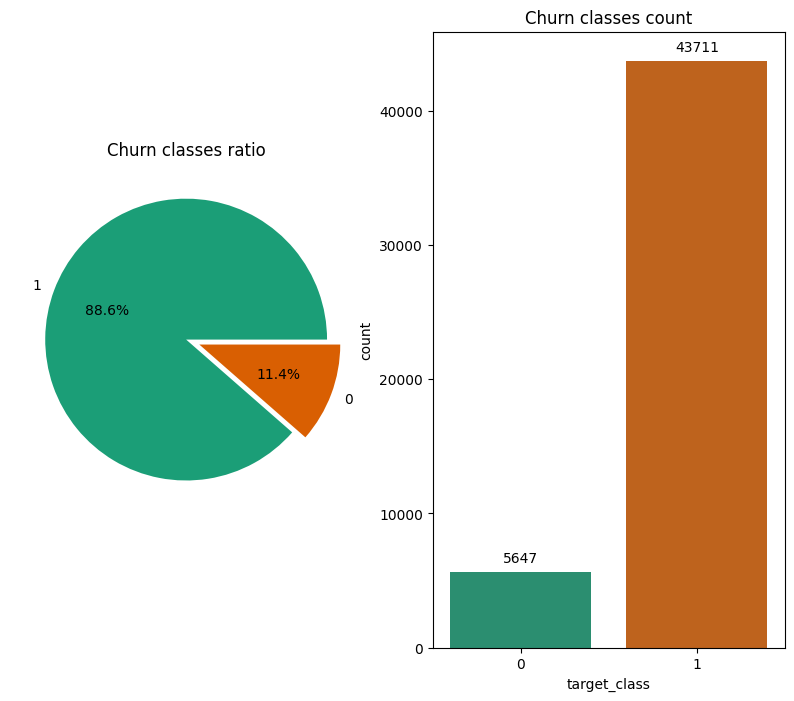

In [76]:
colors = sns.color_palette("Dark2")  # You can choose any other palette

# Create subplots with 1 row and 2 columns
f, ax = plt.subplots(1, 2, figsize=(10, 8))

# Plot pie chart on the first subplot with the specified colors
rawraw_df['target_class'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], colors=colors)
ax[0].set_title('Churn classes ratio')
ax[0].set_ylabel('')

# Plot count plot on the second subplot with the same specified colors
sns.countplot(x='target_class', data=rawraw_df, ax=ax[1], palette=colors)
ax[1].set_title('Churn classes count')
ax[1].grid(False)  # Turn off grid
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Show the plots
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

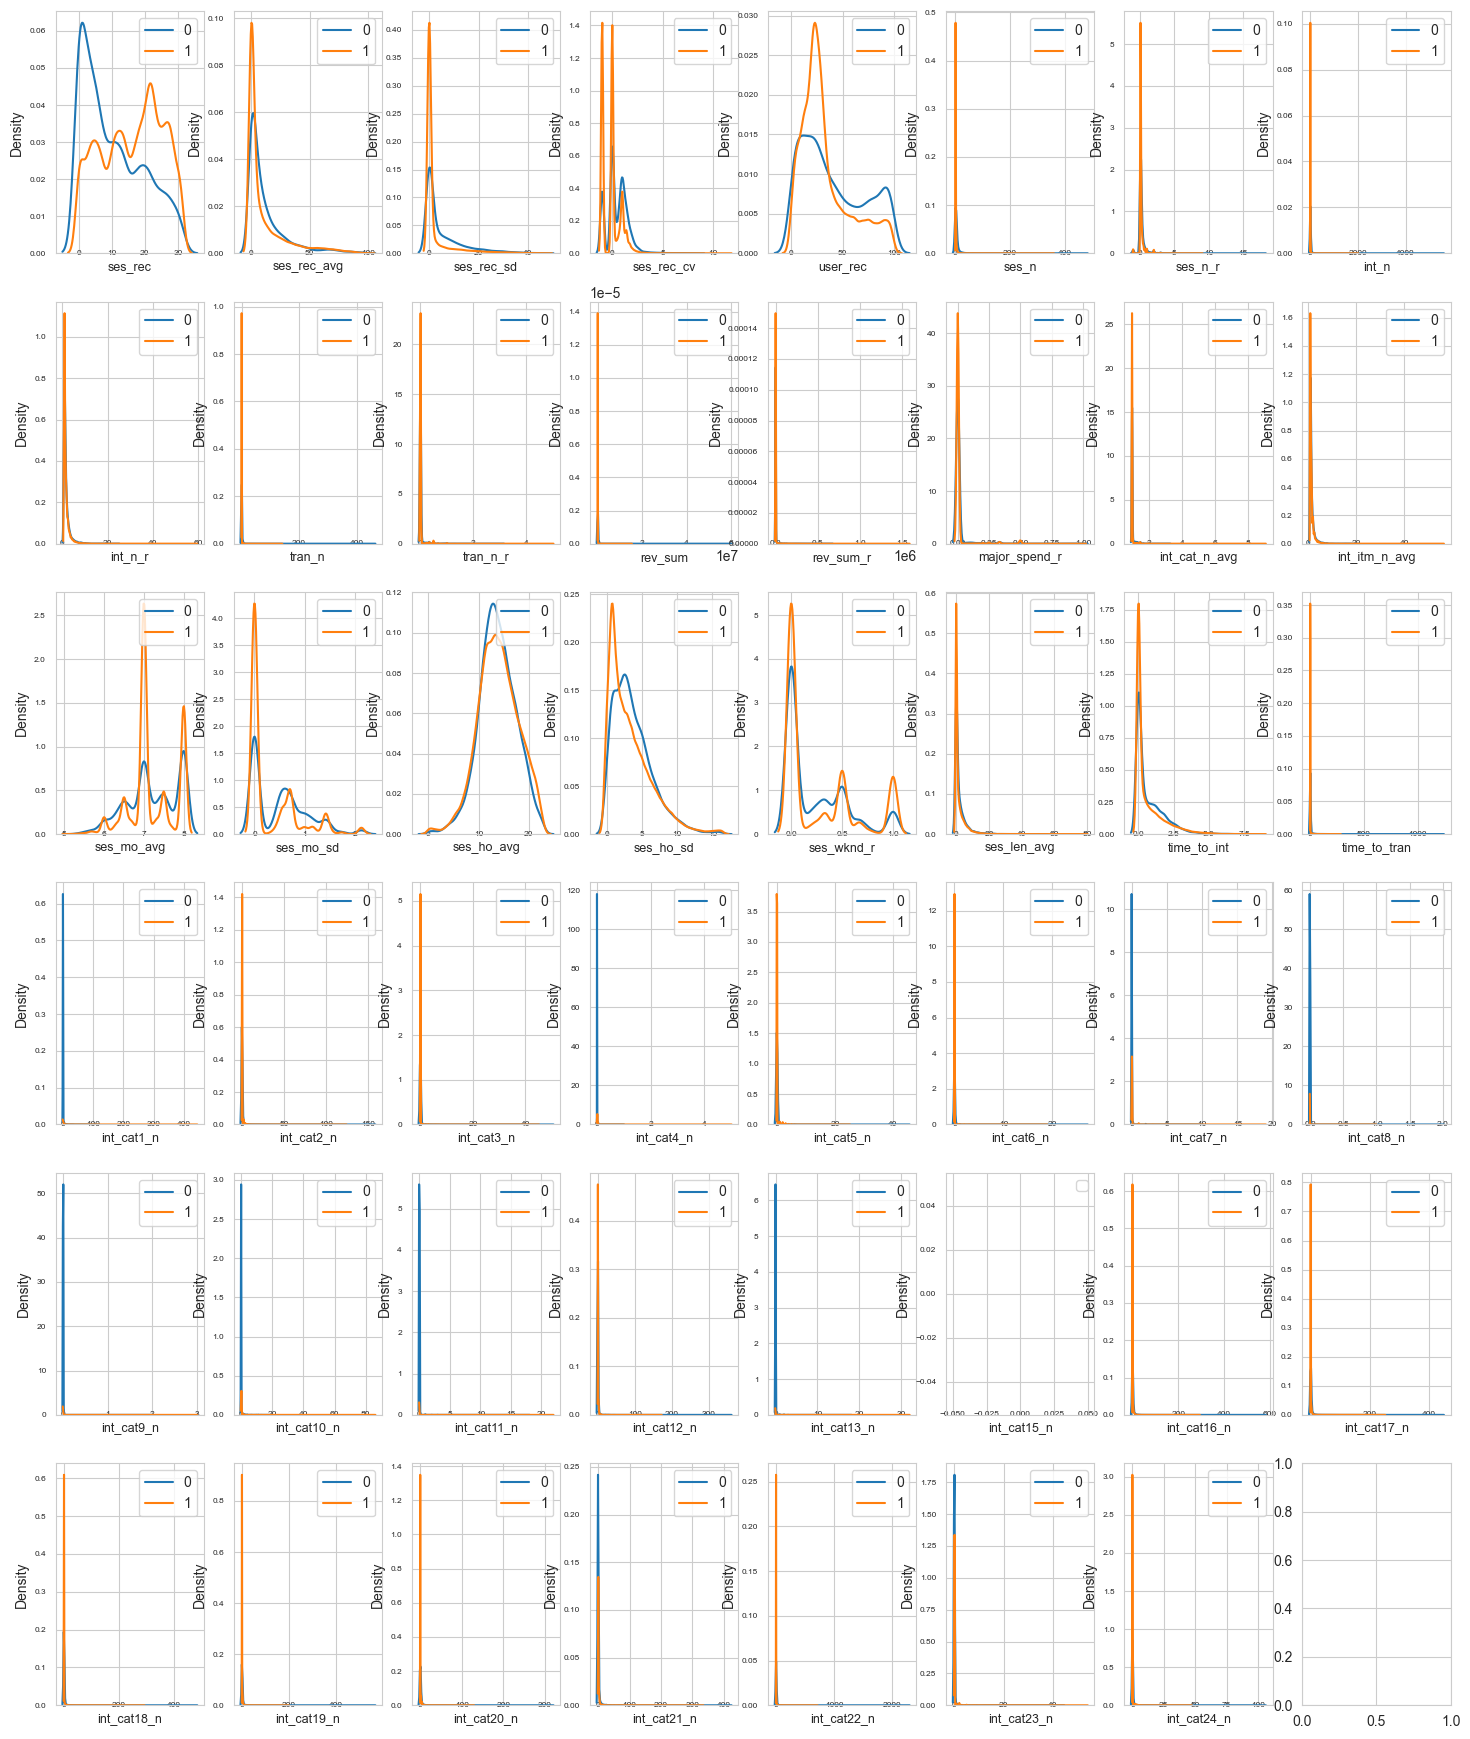

In [77]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(6,8,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(6,8,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
        plt.legend(loc='upper right')
    plt.show();

t0 = rawraw_df.loc[rawraw_df['target_class'] == 0]
t1 = rawraw_df.loc[rawraw_df['target_class'] == 1]
features = rawraw_df.columns.values[1:48]
plot_feature_distribution(t0, t1, '0', '1', features)

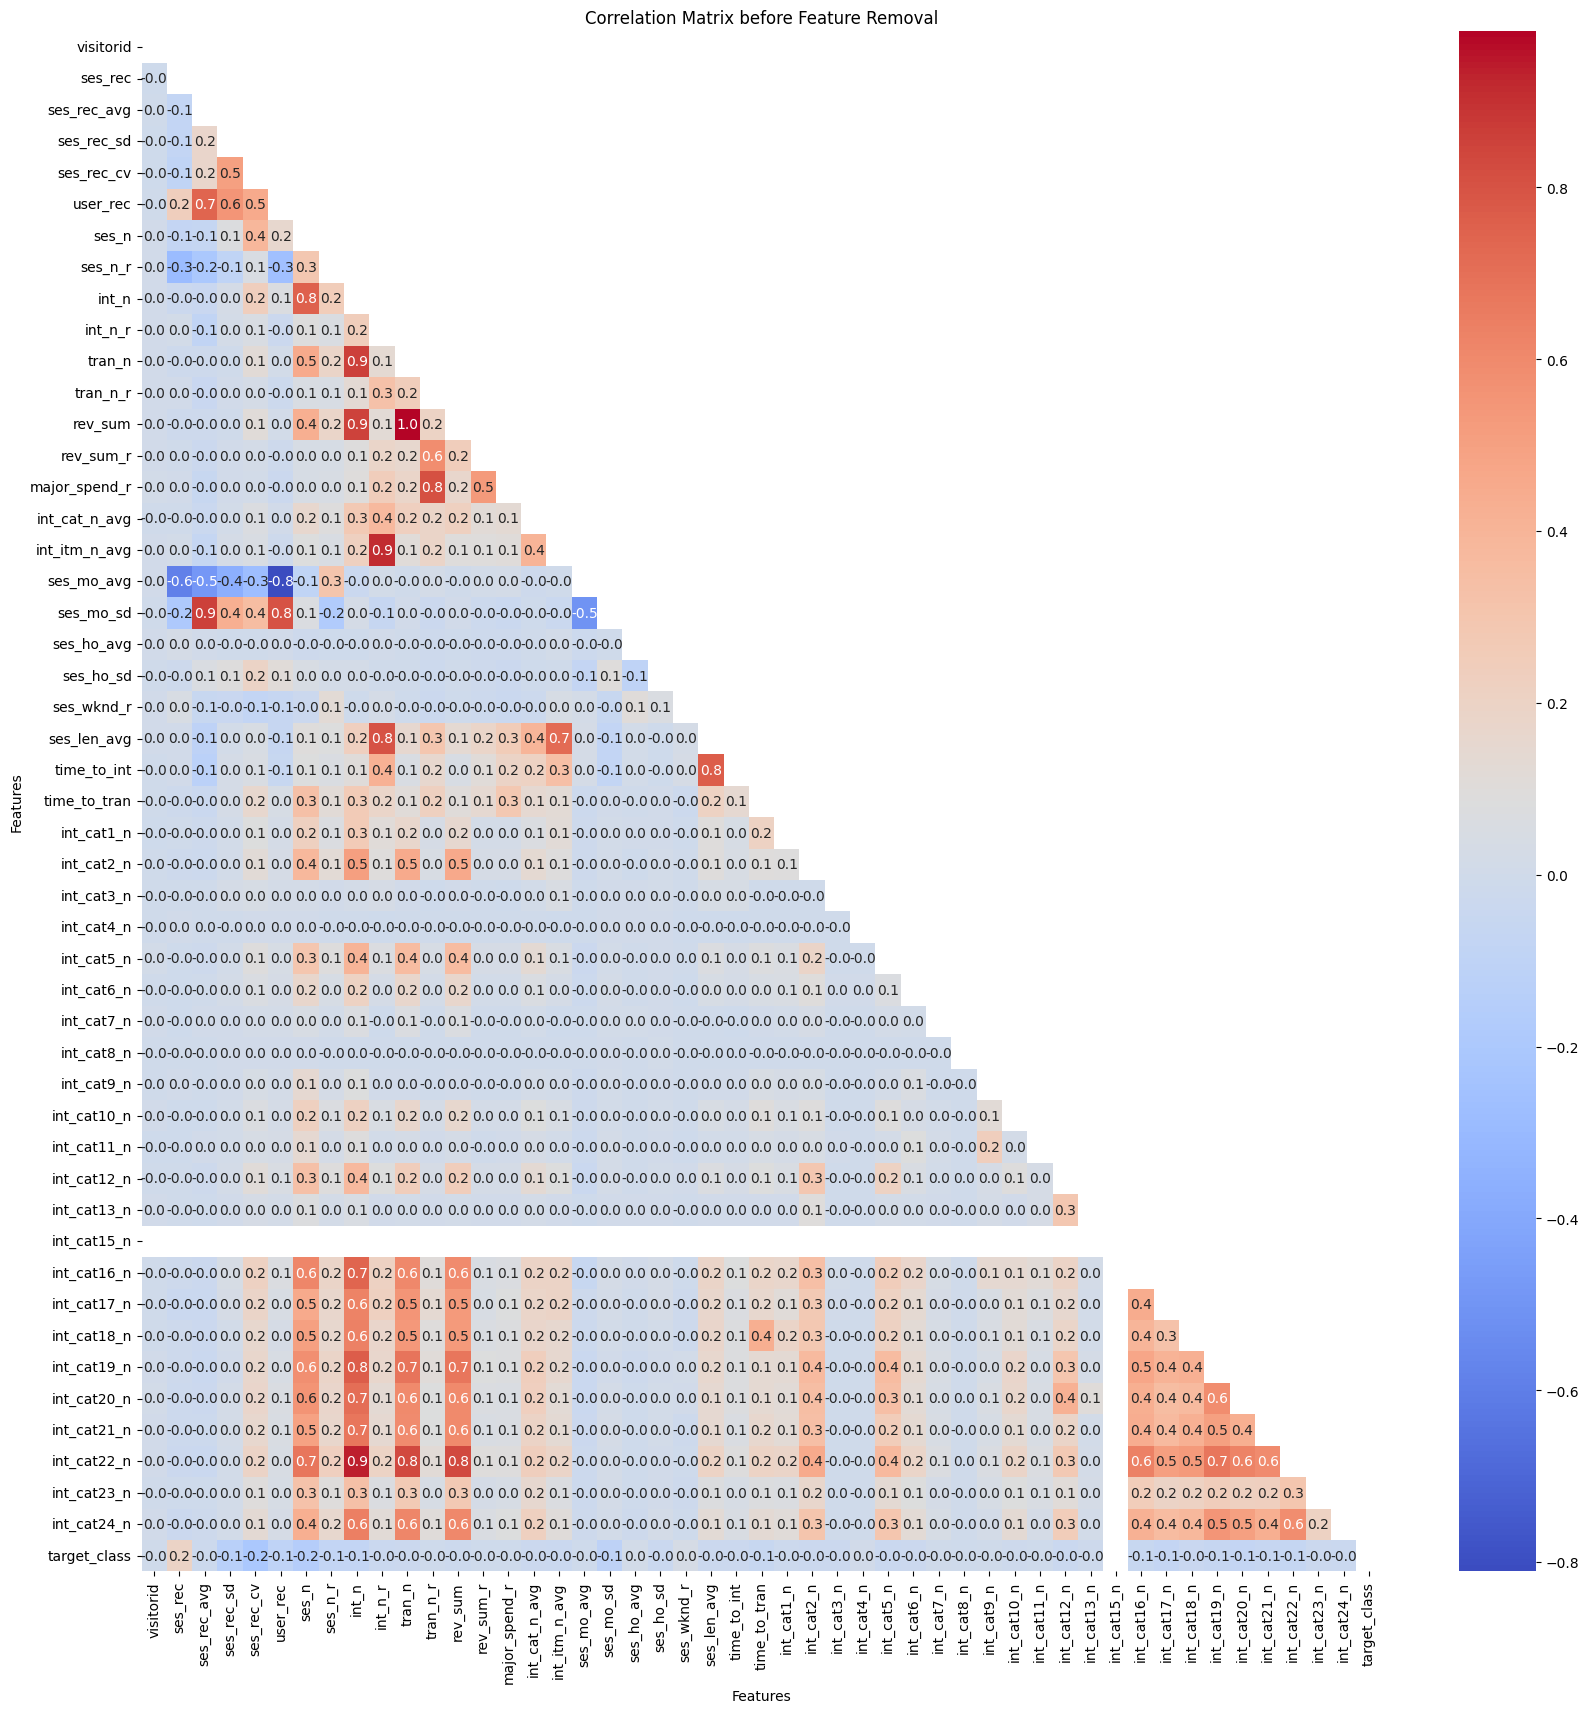

In [78]:
sns.reset_orig() 
correlation_matrix = rawraw_df.corr()
corr_matrix = pd.DataFrame(correlation_matrix)

# Extract diagonal elements of the correlation matrix
# Create a mask to hide the upper triangle (including diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the lower triangle of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, cbar=True, fmt='.1f')
plt.title('Correlation Matrix before Feature Removal')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

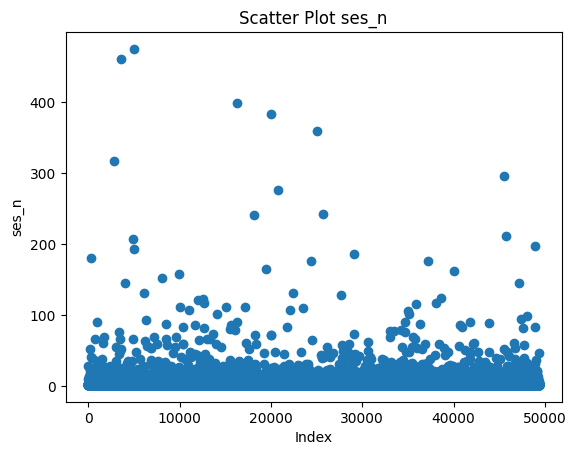

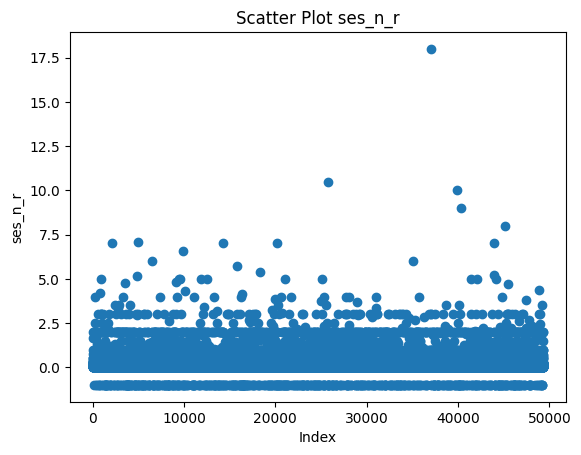

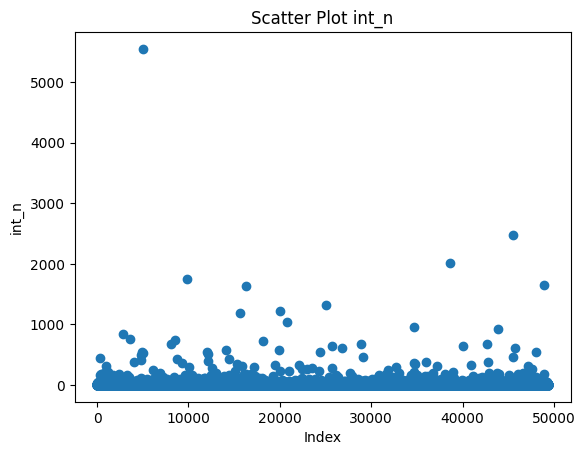

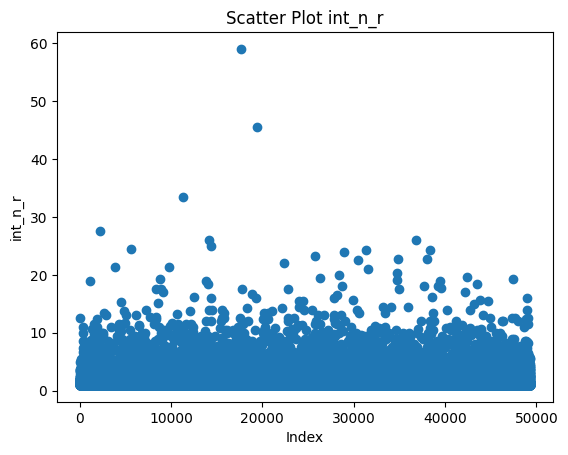

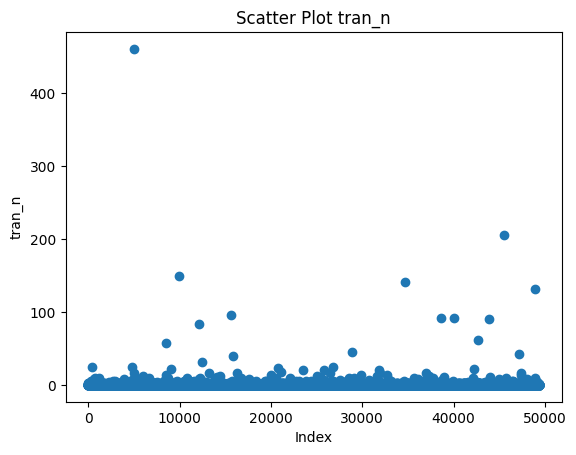

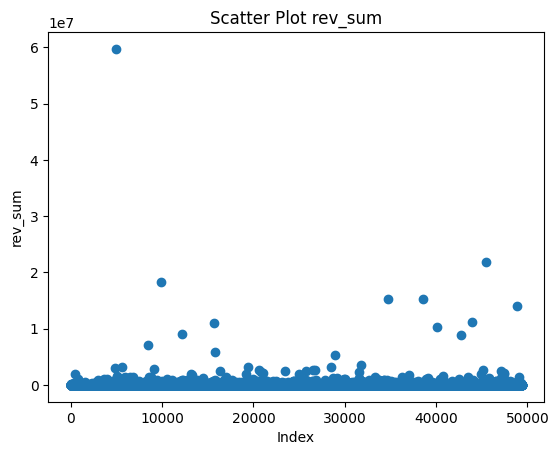

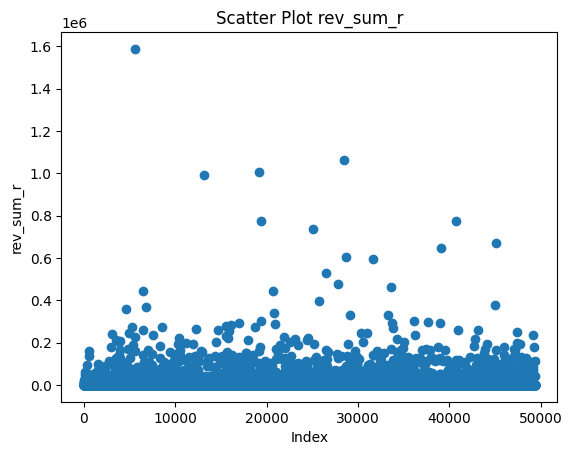

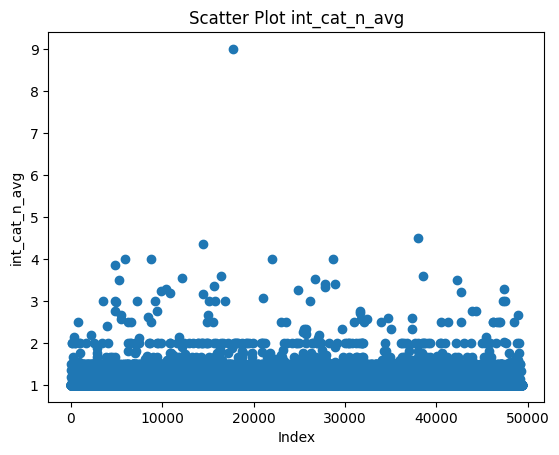

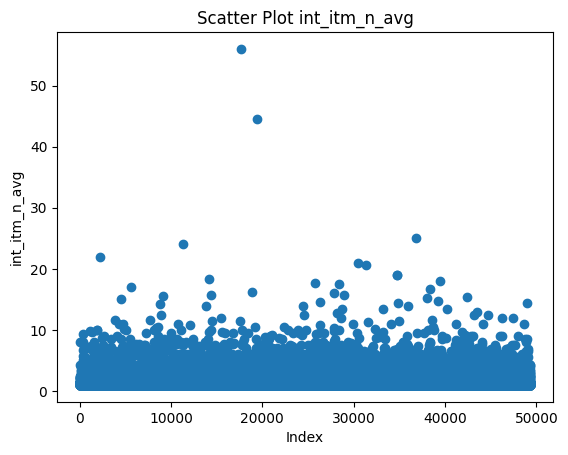

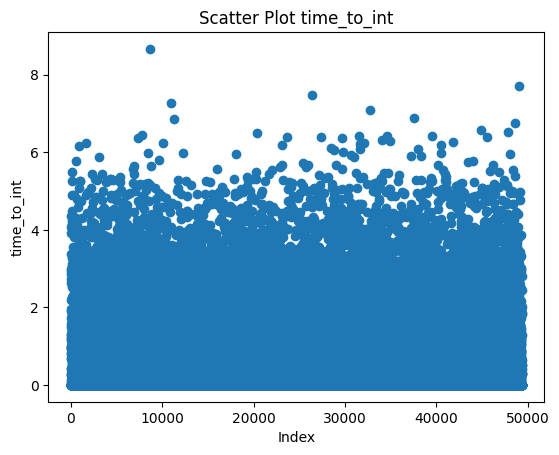

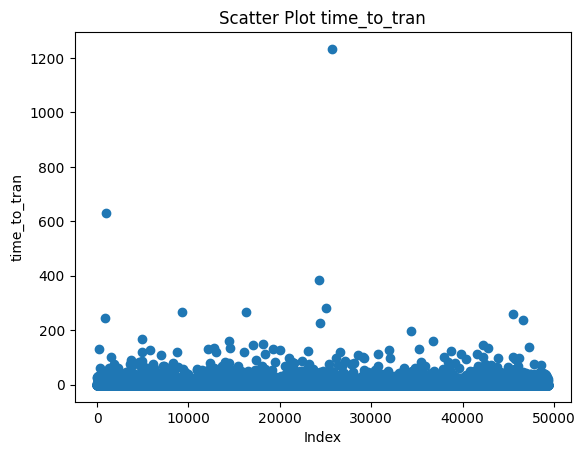

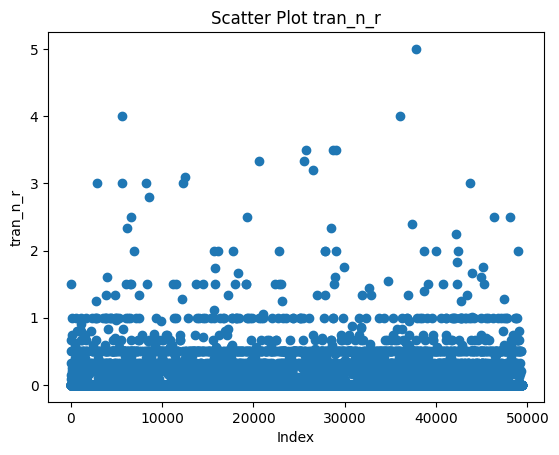

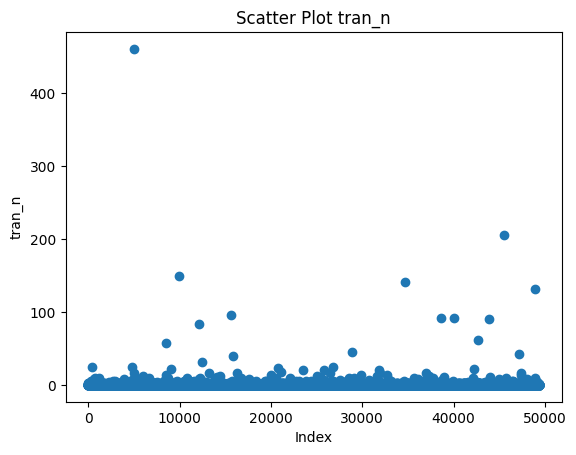

In [79]:
col_list = ['ses_n','ses_n_r','int_n','int_n_r','tran_n','rev_sum','rev_sum_r',
       'int_cat_n_avg','int_itm_n_avg','time_to_int','time_to_tran','tran_n_r','tran_n']
sns.reset_orig() 
for col in col_list:
       # Assuming df is your DataFrame and 'column_name' is the column you want to plot
       plt.scatter(rawraw_df.index, rawraw_df[col])  # Using index as x-axis
       plt.xlabel('Index')  # Customize the x-axis label if needed
       plt.ylabel(col)  # Customize the y-axis label if needed
       plt.title(f'Scatter Plot {col}')  # Customize the title of the plot if needed
       plt.show()

In [80]:
print(rawraw_df.shape)
raw_df =rawraw_df[rawraw_df['ses_n']<=100]
print(raw_df.shape)
raw_df =raw_df[raw_df['ses_n_r']<=20] #17
print(raw_df.shape)
raw_df =raw_df[raw_df['int_n']<=1000]
print(raw_df.shape)
raw_df =raw_df[raw_df['int_n_r']<=20]
print(raw_df.shape)
raw_df =raw_df[raw_df['tran_n']<=100]
print(raw_df.shape)
raw_df =raw_df[raw_df['rev_sum']<=10000000]
print(raw_df.shape)
raw_df =raw_df[raw_df['rev_sum_r']<=1000000] #300000
print(raw_df.shape)
raw_df =raw_df[raw_df['int_cat_n_avg']<=4]
print(raw_df.shape)
raw_df =raw_df[raw_df['int_itm_n_avg']<=40]
print(raw_df.shape)
raw_df =raw_df[raw_df['time_to_int']<=8]
print(raw_df.shape)
raw_df =raw_df[raw_df['time_to_tran']<=120]  
print(raw_df.shape)
raw_df =raw_df[raw_df['tran_n_r']<=3]
print(raw_df.shape)

(49358, 49)
(49316, 49)
(49316, 49)
(49315, 49)
(49295, 49)
(49294, 49)
(49293, 49)
(49290, 49)
(49290, 49)
(49290, 49)
(49289, 49)
(49261, 49)
(49252, 49)


In [81]:
#The dataset contains no duplicates
unique_id = raw_df["visitorid"].nunique()
print("Unique IDs count:", unique_id)

Unique IDs count: 49252


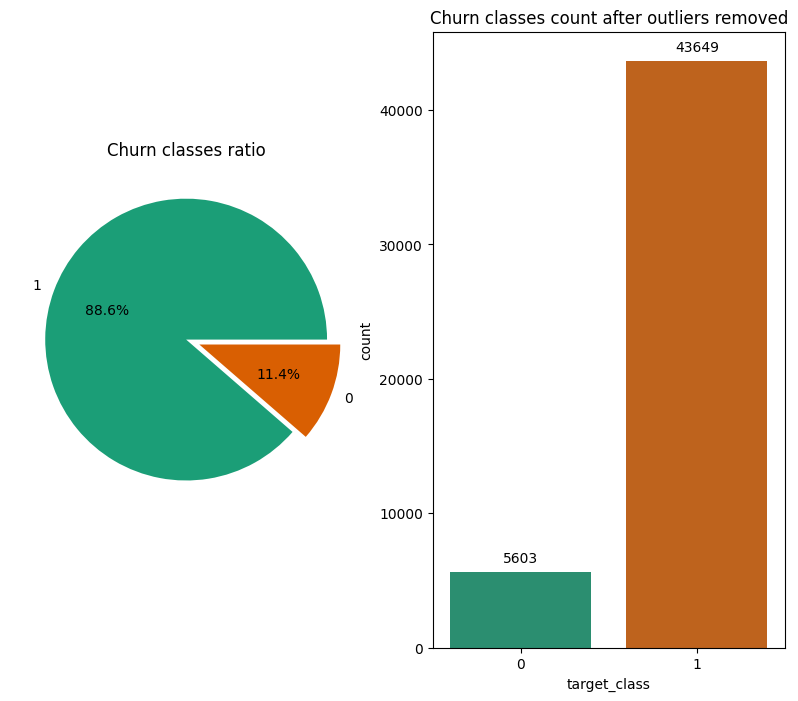

In [82]:

colors = sns.color_palette("Dark2")  # You can choose any other palette

# Create subplots with 1 row and 2 columns
f, ax = plt.subplots(1, 2, figsize=(10, 8))

# Plot pie chart on the first subplot with the specified colors
raw_df['target_class'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], colors=colors)
ax[0].set_title('Churn classes ratio')
ax[0].set_ylabel('')

# Plot count plot on the second subplot with the same specified colors
sns.countplot(x='target_class', data=raw_df, ax=ax[1], palette=colors)
ax[1].set_title('Churn classes count after outliers removed')
ax[1].grid(False)  # Turn off grid
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Show the plots
plt.show()

# 2. Data preprocessing

In [83]:
col_del = ['int_cat1_n',
 'int_cat2_n',
 'int_cat3_n',
 'int_cat4_n',
 'int_cat5_n',
 'int_cat6_n',
 'int_cat7_n',
 'int_cat8_n',
 'int_cat9_n',
 'int_cat10_n',
 'int_cat11_n',
 'int_cat12_n',
 'int_cat13_n',
 'int_cat15_n',
 'int_cat16_n',
 'int_cat17_n',
 'int_cat18_n',
 'int_cat19_n',
 'int_cat20_n',
 'int_cat21_n',
 'int_cat22_n',
 'int_cat23_n',
 'int_cat24_n']
raw_df.drop(columns = col_del, inplace = True)
raw_df.drop(columns = 'visitorid', inplace = True)
raw_df.head()

,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,tran_n,tran_n_r,rev_sum,rev_sum_r,major_spend_r,int_cat_n_avg,int_itm_n_avg,ses_mo_avg,ses_mo_sd,ses_ho_avg,ses_ho_sd,ses_wknd_r,ses_len_avg,time_to_int,time_to_tran,target_class
0,23.0,16.0,0.0,0.0,39.0,2.0,0.051282,3.0,1.500000,0.0,0.0,0.0,0.0,0.0,1.0,1.5,7.000000,0.000000,11.000000,7.071068,0.500000,2.866667,1.911111,-1.0,1
1,23.0,61.0,0.0,0.0,85.0,2.0,0.023529,2.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.000000,1.414214,13.500000,2.121320,1.000000,0.000000,0.000000,-1.0,1
2,14.0,0.1,0.3,3.0,21.0,11.0,0.523810,13.0,1.181818,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.454546,0.522233,12.636364,4.342182,0.363636,1.104545,0.934615,-1.0,1
3,11.0,13.0,0.0,0.0,24.0,2.0,0.083333,4.0,2.000000,0.0,0.0,0.0,0.0,0.0,1.5,1.5,7.500000,0.707107,11.500000,4.949748,0.000000,0.508333,0.254167,-1.0,1
4,16.0,26.0,0.0,0.0,43.0,2.0,0.046512,2.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.000000,0.000000,19.500000,2.121320,0.500000,0.000000,0.000000,-1.0,1


In [84]:
raw_df.columns.tolist()

['ses_rec',
 'ses_rec_avg',
 'ses_rec_sd',
 'ses_rec_cv',
 'user_rec',
 'ses_n',
 'ses_n_r',
 'int_n',
 'int_n_r',
 'tran_n',
 'tran_n_r',
 'rev_sum',
 'rev_sum_r',
 'major_spend_r',
 'int_cat_n_avg',
 'int_itm_n_avg',
 'ses_mo_avg',
 'ses_mo_sd',
 'ses_ho_avg',
 'ses_ho_sd',
 'ses_wknd_r',
 'ses_len_avg',
 'time_to_int',
 'time_to_tran',
 'target_class']

In [85]:
target=raw_df['target_class']

In [86]:
raw_df.head()

,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,tran_n,tran_n_r,rev_sum,rev_sum_r,major_spend_r,int_cat_n_avg,int_itm_n_avg,ses_mo_avg,ses_mo_sd,ses_ho_avg,ses_ho_sd,ses_wknd_r,ses_len_avg,time_to_int,time_to_tran,target_class
0,23.0,16.0,0.0,0.0,39.0,2.0,0.051282,3.0,1.500000,0.0,0.0,0.0,0.0,0.0,1.0,1.5,7.000000,0.000000,11.000000,7.071068,0.500000,2.866667,1.911111,-1.0,1
1,23.0,61.0,0.0,0.0,85.0,2.0,0.023529,2.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.000000,1.414214,13.500000,2.121320,1.000000,0.000000,0.000000,-1.0,1
2,14.0,0.1,0.3,3.0,21.0,11.0,0.523810,13.0,1.181818,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.454546,0.522233,12.636364,4.342182,0.363636,1.104545,0.934615,-1.0,1
3,11.0,13.0,0.0,0.0,24.0,2.0,0.083333,4.0,2.000000,0.0,0.0,0.0,0.0,0.0,1.5,1.5,7.500000,0.707107,11.500000,4.949748,0.000000,0.508333,0.254167,-1.0,1
4,16.0,26.0,0.0,0.0,43.0,2.0,0.046512,2.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7.000000,0.000000,19.500000,2.121320,0.500000,0.000000,0.000000,-1.0,1


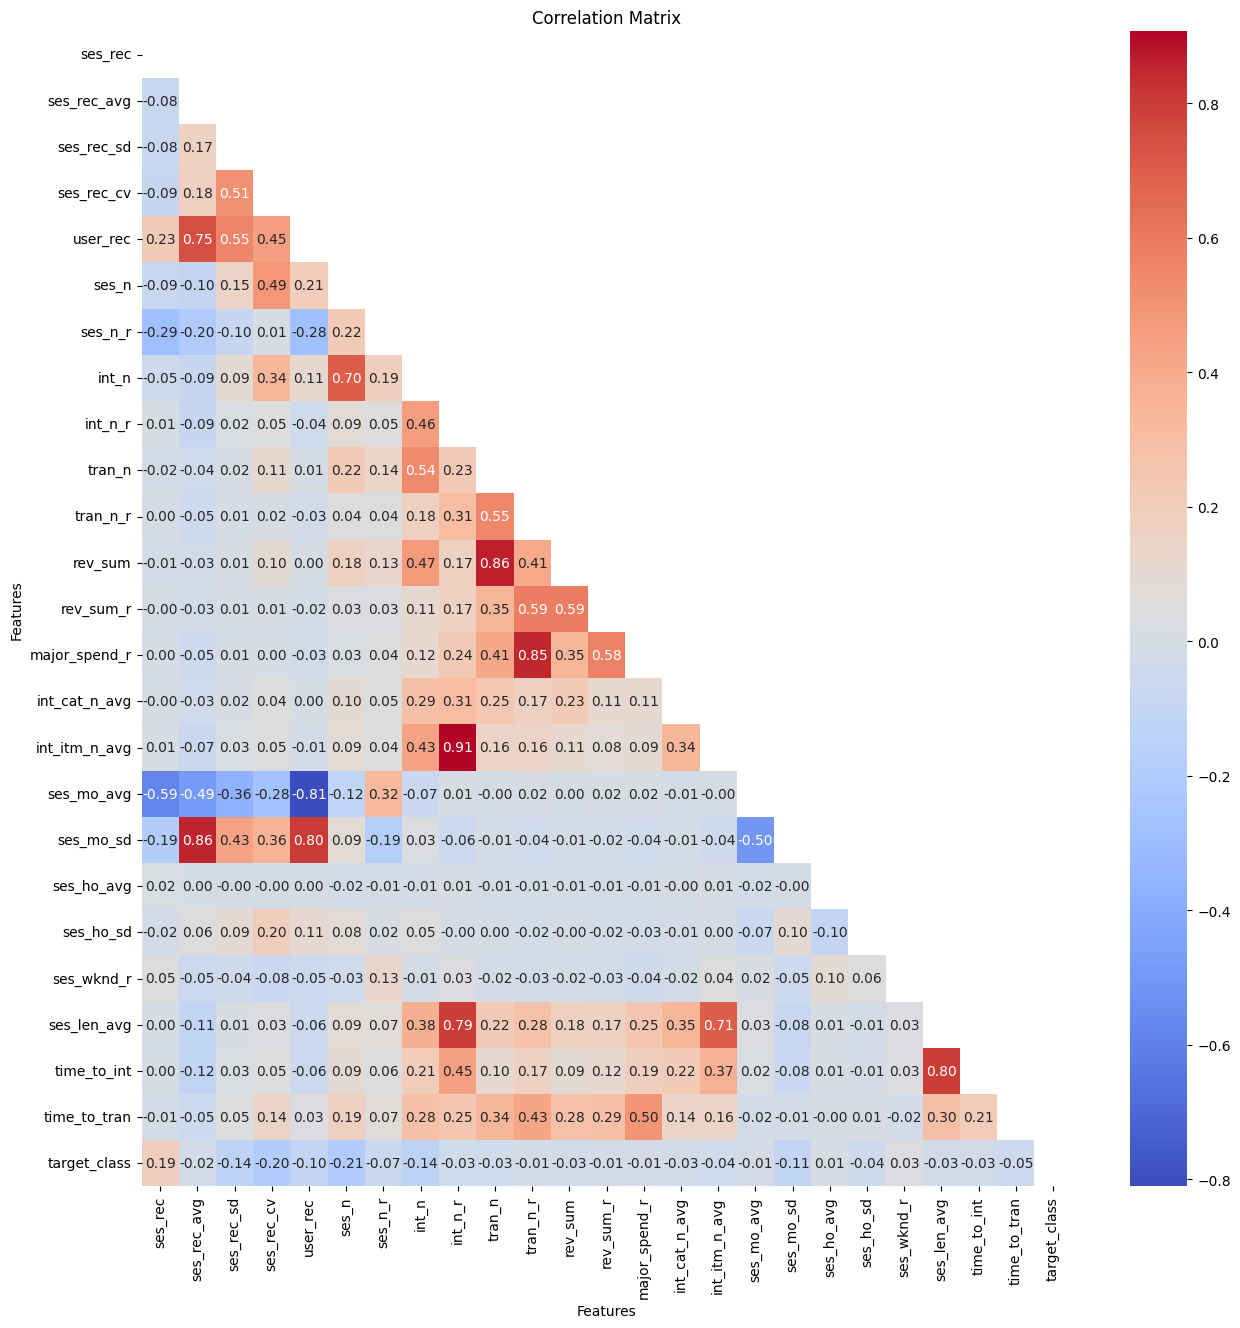

In [87]:
sns.reset_orig() 
correlation_matrix = raw_df.corr()
corr_matrix = pd.DataFrame(correlation_matrix)

# Extract diagonal elements of the correlation matrix
# Create a mask to hide the upper triangle (including diagonal)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the lower triangle of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, cbar=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [88]:
## Preprocess data using a pipeline

raw_df.drop(columns = ['target_class'], inplace = True)
X_train,X_test,y_train,y_test = train_test_split(raw_df, target, test_size = 0.2, random_state = 3131)
num_trans = StandardScaler()

tran_steps = [("scale",QuantileTransformer(output_distribution='normal'))]
# tran_steps = [("nzv", SelectPercentile(score_func=f_classif, percentile=75)), ("scale",QuantileTransformer()),
#     ("poly", PolynomialFeatures())],("dr", PCA(n_components=0.8))]

#Apply separated processing steps for numerical and categorical features
preprocessing = Pipeline(steps=tran_steps)

X_train_encoded = preprocessing.fit_transform(X_train,y_train)

#Get features name from the preprocessing step
# Original name is cat__... or num__... so we only take the name starting from index 5
feature_names = [name for name in preprocessing.get_feature_names_out()]
X_test_encoded = preprocessing.transform(X_test)

print(feature_names)
print(X_train_encoded[:5])

['ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv', 'user_rec', 'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n', 'tran_n_r', 'rev_sum', 'rev_sum_r', 'major_spend_r', 'int_cat_n_avg', 'int_itm_n_avg', 'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd', 'ses_wknd_r', 'ses_len_avg', 'time_to_int', 'time_to_tran']
[[-1.50965636 -5.19933758 -5.19933758 -5.19933758 -2.11966823 -5.19933758
   2.4320167  -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758  5.19933758 -5.19933758
   0.0414126  -0.44314942  5.19933758 -5.19933758 -5.19933758 -5.19933758]
 [-0.78162595 -5.19933758 -5.19933758 -5.19933758 -1.38790766 -5.19933758
   1.25298763 -5.19933758 -5.19933758 -5.19933758 -5.19933758 -5.19933758
  -5.19933758 -5.19933758 -5.19933758 -5.19933758  5.19933758 -5.19933758
  -0.2252024   0.07408727 -5.19933758 -5.19933758 -5.19933758 -5.19933758]
 [-0.13844354 -0.12073125  0.73973722  0.84807465 -0.5249764   1.01667238
   0.90141564 

In [89]:
y_train_df = pd.DataFrame(y_train, columns = ['target_class'])
y_test_df = pd.DataFrame(y_test, columns = ['target_class'])
X_train_df=pd.DataFrame(X_train_encoded, columns=feature_names)
X_test_df=pd.DataFrame(X_test_encoded,columns=feature_names)
print(X_train_df.shape)
print(X_test_df.shape)
print(y_train_df.shape)
print(y_test_df.shape)

(39401, 24)
(9851, 24)
(39401, 1)
(9851, 1)


### Save checkpoints

In [90]:
#Save a checkpoint for training and testing data
X_train_df.to_csv('data/train_features.csv',index=False)
X_test_df.to_csv('data/test_features.csv',index=False)
y_train_df.to_csv('data/train_target.csv',index=False)
y_test_df.to_csv('data/test_target.csv',index=False)

# 3. Baseline models

In [91]:
X_train_df = pd.read_csv('data/train_features.csv')
X_test_df = pd.read_csv('data/test_features.csv')
y_train = pd.read_csv('data/train_target.csv')
y_test = pd.read_csv('data/test_target.csv')
y_test.value_counts()

target_class
1               8780
0               1071
dtype: int64

## 3.1 Pipeline settings

In [92]:
##1. Experiment 1: Training models with imbalanced data
pipe_lr_imb = Pipeline([('LR', LogisticRegression(random_state=31))])
pipe_svm_imb = Pipeline([('SVM', SVC(probability=True,random_state=31))])
pipe_xgb_imb = Pipeline([('XGB', xgb.XGBClassifier(random_state=31))])
pipe_lgbm_imb = Pipeline([('LGBM', LGBMClassifier(random_state=31))])

##For resampling, the imblearn library will be used to integrate resampling step with the pipeline
## 2. Experiment 2: Training models with data resampledby using SMOTE (Oversampling)

pipe_lr_os = Pipeline([('resampling', SMOTE(k_neighbors=5, random_state=31)), 
                       ('LR', LogisticRegression(random_state=31))])
pipe_svm_os = Pipeline([('resampling', SMOTE(k_neighbors=5, random_state=31)),
                        ('SVM', SVC(probability=True,random_state=31))])
pipe_xgb_os = Pipeline([('resampling', SMOTE(k_neighbors=5, random_state=31)),
                        ('XGB', xgb.XGBClassifier(random_state=31))])
pipe_lgbm_os = Pipeline([('resampling', SMOTE(k_neighbors=5, random_state=31)),
                         ('LGBM', LGBMClassifier(random_state=31))])

## 3. Experiment 3: Training models with data resampledby using SMOTE - Tomek Links (Hybrid resampling)
pipe_lr_hybrid = Pipeline([('resampling',SMOTETomek(random_state=31)), 
            ('LR', LogisticRegression(random_state=31))])
pipe_svm_hybrid = Pipeline([('resampling',SMOTETomek(random_state=31)),
                        ('SVM', SVC(probability=True,random_state=3131))])
pipe_xgb_hybrid =Pipeline([('resampling',SMOTETomek(random_state=31)),
                       ('XGB', xgb.XGBClassifier(random_state=31))])
pipe_lgbm_hybrid =Pipeline([('resampling',SMOTETomek(random_state=31)),
                        ('LGBM', LGBMClassifier(random_state=31))])


## 3.1 Baseline models with no hyperparameter tuning

In [93]:
pipeline_list =[
    ('LR-Imbalanced data',pipe_lr_imb), ('XGB-Imbalanced data', pipe_xgb_imb), ('LGBM-Imbalanced data',pipe_lgbm_imb),
                ('LR-SMOTE', pipe_lr_os), ('XGB-SMOTE', pipe_xgb_os), ('LGBM-SMOTE', pipe_lgbm_os),
                ('LR-SMOTE Tomek Links', pipe_lr_hybrid), ('XGB-SMOTE Tomek Links', pipe_xgb_hybrid), ('LGBM-SMOTE Tomek Links', pipe_lgbm_hybrid),
                ('SVM-Imbalanced data',pipe_svm_imb), ('SVM-SMOTE', pipe_svm_os), ('SVM-SMOTE Tomek Links', pipe_svm_hybrid)
                ]
                
baseline_results = {}

[LightGBM] [Info] Number of positive: 34869, number of negative: 4532
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4185
[LightGBM] [Info] Number of data points in the train set: 39401, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.884978 -> initscore=2.040435
[LightGBM] [Info] Start training from score 2.040435
[LightGBM] [Info] Number of positive: 34869, number of negative: 34869
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6114
[LightGBM] [Info] Number of data points in the train set: 69738, number of used features: 24
[LightGBM] [Info] [bi

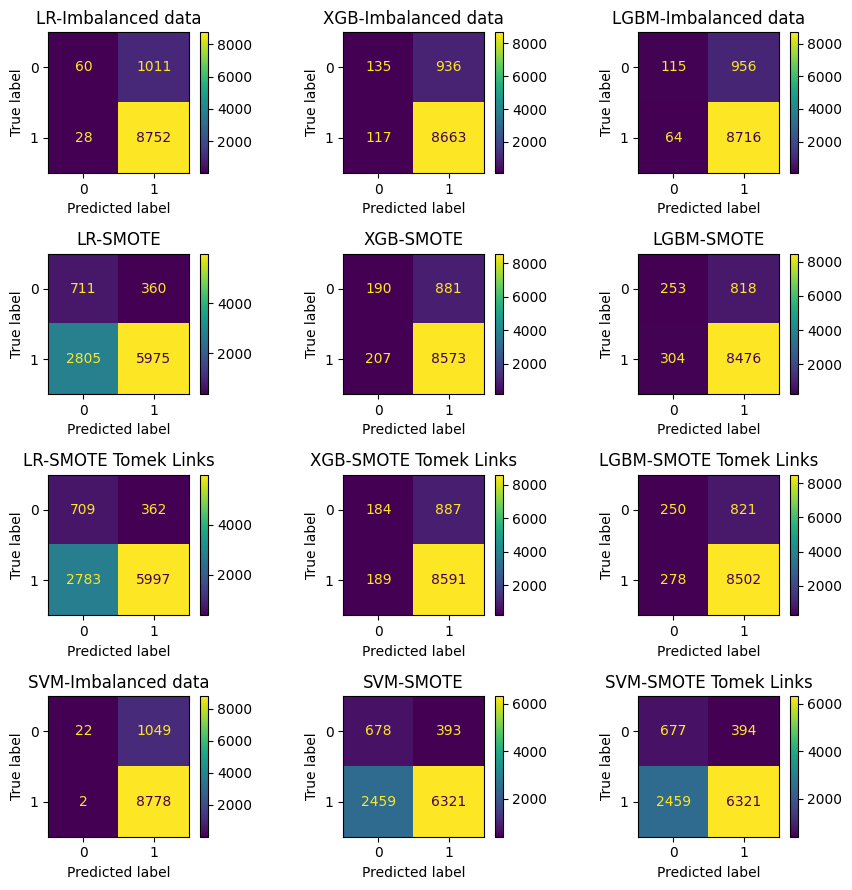

,Accuracy,Precision,Recall,F1,AUC
LR-Imbalanced data,0.894528,0.896446,0.996811,0.943968,0.735437
XGB-Imbalanced data,0.893107,0.902490,0.986674,0.942706,0.728928
LGBM-Imbalanced data,0.896457,0.901158,0.992711,0.944721,0.748704
LR-SMOTE,0.678713,0.943173,0.680524,0.790605,0.737436
XGB-SMOTE,0.889554,0.906812,0.976424,0.940331,0.726042
LGBM-SMOTE,0.886103,0.911986,0.965376,0.937922,0.735047
LR-SMOTE Tomek Links,0.680743,0.943073,0.683030,0.792258,0.737623
XGB-SMOTE Tomek Links,0.890773,0.906415,0.978474,0.941067,0.727078
LGBM-SMOTE Tomek Links,0.888438,0.911938,0.968337,0.939292,0.737163
SVM-Imbalanced data,0.893310,0.893253,0.999772,0.943516,0.585150


In [94]:
baseline_results = {}

# Create a figure and axis for subplots
fig, axes = plt.subplots(4, 3, figsize=(9, 9))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, (name, p) in enumerate(pipeline_list):
    model = p.fit(X_train_df, y_train)
    y_test_pred = model.predict(X_test_df)
    y_test_pred_proba = model.predict_proba(X_test_df)

    clf_report = classification_report(y_test, y_test_pred, output_dict=True)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Display confusion matrix in subplot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i])
    axes[i].set_title(f'{name}')

    auc_test = roc_auc_score(y_test, y_test_pred_proba[:, 1])
    precision = precision_score(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Store the results
    baseline_results[name] = {'Accuracy': accuracy,
                              'Precision': precision,
                              'Recall': recall,
                              'F1': f1,
                              'AUC': auc_test
                              }

# Hide the empty subplots
for ax in axes[len(pipeline_list):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

baseline_df = pd.DataFrame(baseline_results).T  # Transpose the dataframe into a more readable format
baseline_df

In [95]:
baseline_df.to_csv('output/pretuning.csv',index=False)